# Python for (open) Neuroscience

_Lecture 3.0_ - Introduction to Statistics and Machine learning in Pyhton

Luigi Petrucco

Jean-Charles Mariani

## Classical statistics using Python

Disclaimer: I know very little about statistics!

No, Python will not tell you what tests to use...

...but `scipy` module provides functions for pretty much any kind of classical statistics you might want to compute!

### Descriptive statistics

#### Mean, median, mode

In [5]:
import numpy as np
import scipy.stats as stats

data = np.random.normal(0, 1, 1000)

print('Mean: {}'.format(np.mean(data)))
print('Median: {}'.format(np.median(data)))
print('Mode: {}'.format(stats.mode(data)[0][0]))

Mean: 0.029733934928529306
Median: 0.031780371438513554
Mode: -2.8907663742262266


/var/folders/wp/q156lfy924zg6bqc48v9j2800000gn/T/ipykernel_48383/3461961053.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('Mode: {}'.format(stats.mode(data)[0][0]))


#### Standard deviation, variance

In [ ]:
print('Standard deviation: {}'.format(np.std(data)))
print('Variance: {}'.format(np.var(data)))

#### Skewness, kurtosis (and other moments)

In [ ]:
print('Skewness: {}'.format(stats.skew(data)))
print('Kurtosis: {}'.format(stats.kurtosis(data)))

#### Quantiles

In [ ]:
print('Quantiles: {}'.format(stats.mstats.mquantiles(data)))

## Statistical tests

### One-sample tests

In [ ]:
# One-sample t-test
stats.ttest_1samp(data, 0)


In [2]:
# One-sample Wilcoxon signed-rank test
stats.wilcoxon(data)

NameError: name 'stats' is not defined

### Two-sample tests

#### Independent samples

# Two-sample t-test

In [ ]:
data2 = np.random.normal(0, 1, 1000)
stats.ttest_ind(data, data2)

# Two-sample Wilcoxon rank-sum test

In [3]:
#Two-sample Wilcoxon rank-sum test
stats.ranksums(data, data2)

NameError: name 'stats' is not defined

#### Paired samples

# Paired t-test

In [ ]:
stats.ttest_rel(data, data2)

# Paired Wilcoxon signed-rank test

In [ ]:
stats.wilcoxon(data, data2)

# One-way ANOVA

In [7]:
data = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1, 1000)
data3 = np.random.normal(-1, 1, 1000)
stats.f_oneway(data, data2, data3)

F_onewayResult(statistic=336.2716574782075, pvalue=1.753778226195978e-132)

# Kolmogorov-Smirnov test

In [116]:
data_norm = np.random.normal(0, 1, 1000)
data_unif = np.random.uniform(0, 1, 1000)

stats.kstest(data_norm, 'norm')

KstestResult(statistic=0.025152811933949804, pvalue=0.5431505054264735, statistic_location=-0.39926985546411436, statistic_sign=1)

### Correlation

In [117]:
data = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1, 1000)
stats.pearsonr(data, data2)

PearsonRResult(statistic=0.04457422464726917, pvalue=0.158983697238195)

## Normality tests

In [118]:
# Test normality of data
data = np.random.normal(0, 1, 1000)
stats.normaltest(data)

NormaltestResult(statistic=1.1283740434558784, pvalue=0.5688223990826481)

# Curve fitting

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generate data
x = np.linspace(0, 4, 50)
ydata = func(x, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(x))


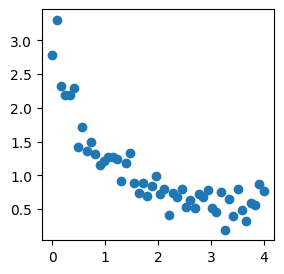

In [27]:
# plot the data
plt.figure(figsize=(3, 3))
plt.scatter(x, ydata, label='data')

In [29]:
# Fit the data
popt, pcov = curve_fit(func, x, ydata)


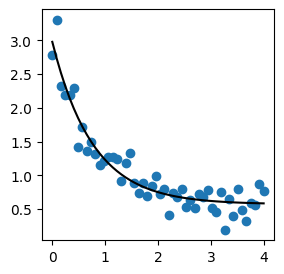

In [33]:
plt.figure(figsize=(3, 3))
plt.scatter(x, ydata, label='data')
plt.plot(x, func(x, *popt), c="k", label='fit')

In [30]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

array([2.40747116, 1.2961252 , 0.57180687])

In [31]:
pcov

array([[ 0.01381   ,  0.00584699, -0.00075411],
       [ 0.00584699,  0.01898021,  0.00527861],
       [-0.00075411,  0.00527861,  0.00272736]])

(Practicals 3.2.0)

## Advanced statistics using statsmodels

The `statsmodels` module provides a more complete set of statistical tools, including:
- Linear models
- Generalized linear models
- Multivariate statistics
- ...

### Linear models

In [98]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset('Guerry', 'HistData').data
# data = data[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
data.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [13]:
model = smf.ols('Lottery ~ Literacy + Wealth + Region', data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.07e-05
Time:                        23:54:39   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

### Generalized linear models

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset('Guerry', 'HistData').data
data = data[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()



(Practicals 3.2.1)

# Machine learning using scikit-learn

## Data preprocessing

In [36]:
from sklearn import preprocessing
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [35]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

Other scalers for max-min normalization ( MinMaxScaler), etc.

In [42]:
# Histogram equalization
data = np.random.normal(0, 1, 1000)
quantile_trasformer = preprocessing.QuantileTransformer(n_quantiles=1000)
trasf = quantile_trasformer.fit_transform(data.reshape(-1, 1))

In [43]:
trasf.shape

(1000, 1)

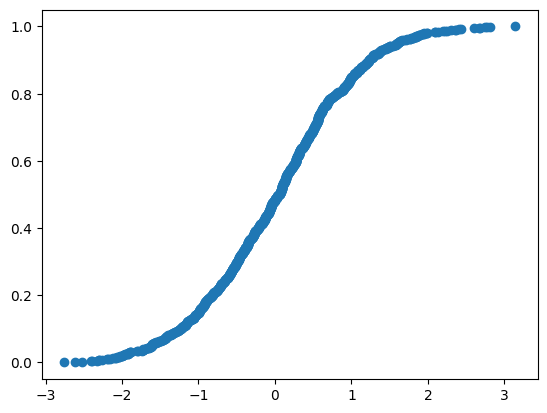

In [44]:
plt.figure()
plt.scatter(data, trasf)

# Dimensionality reduction

### Principal component analysis

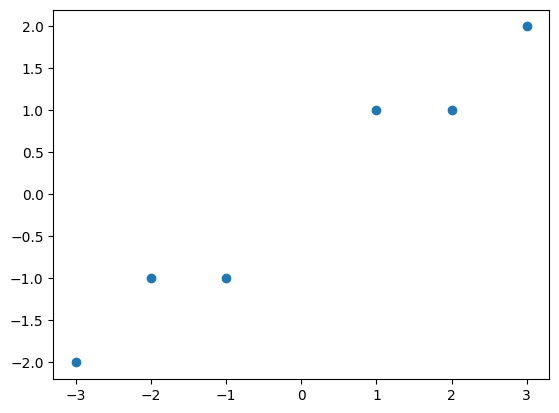

In [49]:
from sklearn.decomposition import PCA

# A simple tw-dimension dataset:
from sklearn import datasets
iris = datasets.load_iris()

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

plt.figure()
plt.scatter(X[:, 0], X[:, 1])

In [51]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


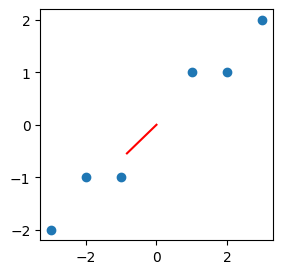

In [56]:
plt.figure(figsize=(3, 3)  )
plt.scatter(X[:, 0], X[:, 1])
plt.plot([0, pca.components_[0, 0]], [0, pca.components_[0, 1]], 'r')

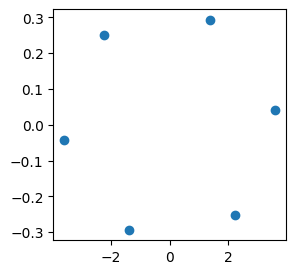

In [53]:
transformed = pca.transform(X)

plt.figure(figsize=(3, 3))
plt.scatter(transformed[:, 0], transformed[:, 1])

In [60]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)

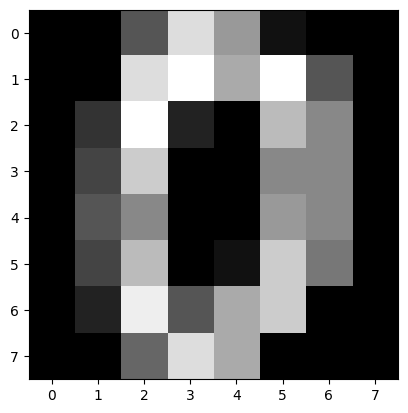

In [78]:
plt.figure()
plt.imshow(data[0, :].reshape(8, 8), cmap="gray")

In [64]:
pca = PCA(n_components=2)
trasf = pca.fit_transform(data)
print(pca.explained_variance_ratio_)

[0.14890594 0.13618771]


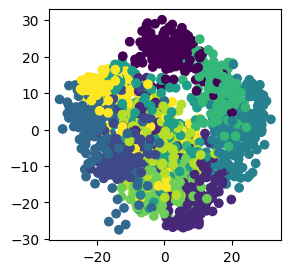

In [66]:
plt.figure(figsize=(3, 3))

plt.scatter(trasf[:, 0], trasf[:, 1], c=labels)

In [96]:
from sklearn.cluster import KMeans

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=10)
labels_predicted = kmeans.fit_predict(data)

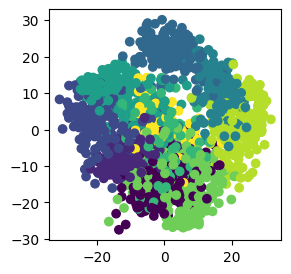

In [97]:
plt.figure(figsize=(3, 3))

plt.scatter(trasf[:, 0], trasf[:, 1], c=labels_predicted)

In [92]:
labels_predicted

array([1, 0, 3, ..., 3, 5, 6], dtype=int32)

(Practicals 3.2.2)